<a href="https://colab.research.google.com/github/yarkalm/def_metallization/blob/main/Metallization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [152]:
df = pd.read_excel('/content/Датасет_металлург.xlsx')



input_data = df[["CO2","CO","H2","Herm","Magn","Temp","Time","m before","m after"]]
output_data = df[["RedDegr"]]

input_data

,CO2,CO,H2,Herm,Magn,Temp,Time,m before,m after
0,80.0,20.0,0.0,0.0,100.0,750,15.0,0.46910,0.3981
1,80.0,20.0,0.0,0.0,100.0,750,30.0,0.45720,0.4126
2,80.0,20.0,0.0,0.0,100.0,750,60.0,0.46820,0.3997
3,80.0,20.0,0.0,0.0,100.0,750,90.0,0.44010,0.3679
4,80.0,20.0,0.0,0.0,100.0,750,120.0,0.44860,0.3715
5,80.0,20.0,0.0,0.0,100.0,750,15.0,0.45350,0.3495
6,80.0,20.0,0.0,0.0,100.0,750,30.0,0.48390,0.4256
7,80.0,20.0,0.0,0.0,100.0,750,60.0,0.46970,0.3837
8,80.0,20.0,0.0,0.0,100.0,750,90.0,0.45460,0.3458
9,80.0,20.0,0.0,0.0,100.0,750,120.0,0.45630,0.3600


In [153]:
output_data

,RedDegr
0,38.033641
1,38.023641
2,57.027486
3,63.945633
4,66.991572
5,89.388389
6,46.961071
7,71.367906
8,93.287730
9,82.262306


In [154]:
x = []
y = []
for i in range(len(input_data)):
  tmp = []
  for j in range(len(input_data.iloc[i])):
    tmp.append(np.asarray(input_data.iloc[i].tolist()[j]))
    

  x.append(np.asarray(tmp).astype(np.float32))
  y.append(np.asarray(output_data.iloc[i]).astype(np.float32))

In [155]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data)

In [156]:
y_train.iloc[0]

RedDegr    57.051699
Name: 338, dtype: float64

In [157]:
model = LGBMRegressor()
model.fit(x_train, np.ravel(y_train))

LGBMRegressor()

In [158]:
model.predict([x_train.iloc[0]])

array([57.68888046])

In [159]:
row = [80,
       20,
       0,
       0,
       100,
       750,
       30,
       0.45,
       0.41]
yhat = model.predict([row])
print('Prediction: %d' % yhat[0]) 

Prediction: 31


In [160]:
y_pred = []
y_real = []
mae = []
perc = []
for i in range(len(x_train)):
  y_pred.append(model.predict([x_train.iloc[i]]))
  y_real.append(y_train.iloc[i])
for i in range(len(x_test)):
  y_pred.append(model.predict([x_test.iloc[i]]))
  y_real.append(y_test.iloc[i])  
for i in range(len(y_pred)):
  mae.append(abs(y_real[i]-y_pred[i]))
  perc.append(100*mae[i]/y_real[i])

test = pd.DataFrame()
test['Предсказанные']=y_pred
test['Предсказанные'] = test['Предсказанные'].str.get(0)
test['Истинные']=y_real
test['Истинные']=test['Истинные'].str.get(0)
test['Ошибка'] = mae
test['Ошибка'] = test['Ошибка'].str.get(0)
test['Отклонение %'] = perc
test['Отклонение %'] = test['Отклонение %'].str.get(0)
test = test.astype(float)
pd.set_option("display.max_rows", None, "display.max_columns", None)
test

,Предсказанные,Истинные,Ошибка,Отклонение %
0,57.688880,57.051699,0.637181,1.116848
1,61.988859,62.282384,0.293524,0.471280
2,22.150959,21.880000,0.270959,1.238388
3,27.946880,27.950000,0.003120,0.011164
4,48.623542,48.710000,0.086458,0.177495
5,60.807318,60.970000,0.162682,0.266822
6,51.061612,51.120000,0.058388,0.114218
7,40.762278,40.940000,0.177722,0.434103
8,20.731296,20.860000,0.128704,0.616989
9,71.201120,69.347741,1.853379,2.672587


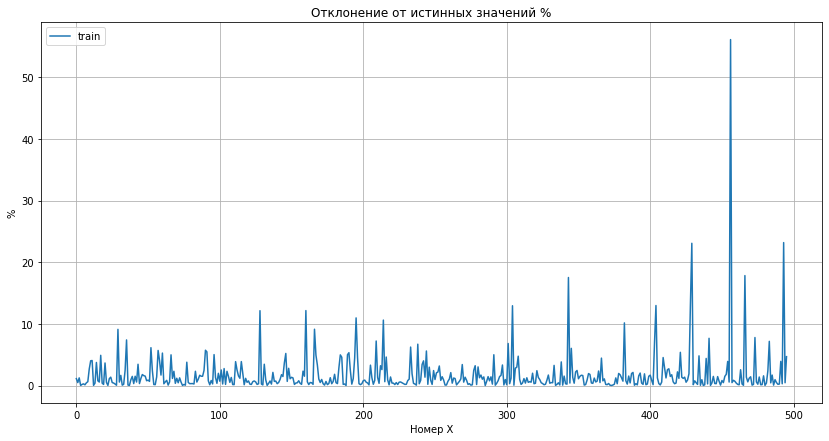

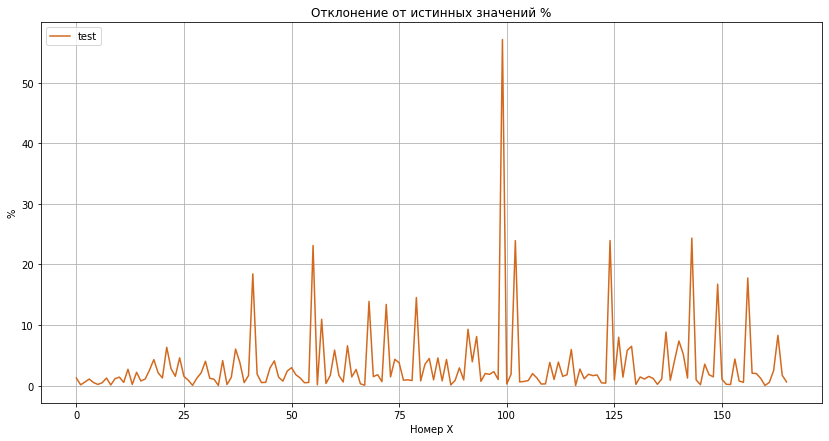

In [161]:
# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_train))),test["Отклонение %"].head(len(x_train)))
plt.title('Отклонение от истинных значений %')
plt.ylabel('%')
plt.xlabel('Номер Х')
plt.legend(['train'], loc='upper left')
plt.grid(True)
plt.savefig("train.png")
plt.show()

# График отклонения от истинных значений в % на обучающей выборке
plt.figure(figsize=(14, 7))
plt.plot(list(range(len(x_test))),test["Отклонение %"].tail(len(y_test)),color='chocolate')
plt.title('Отклонение от истинных значений %')
plt.ylabel('%')
plt.xlabel('Номер Х')
plt.legend(['test'], loc='upper left')
plt.grid(True)
plt.savefig("test.png")
plt.show()